In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  

In [3]:
data=pd.read_csv('loan.csv')

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Data Loading: We started by loading the dataset loan.csv into a Pandas DataFrame to explore and manipulate the data.

In [5]:
# Feature Selection - Dropping 'ID' as it's not useful for prediction
X = data.drop(['ID', 'Personal.Loan'], axis=1)
y = data['Personal.Loan']


# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


We dropped the 'ID' column as it's not useful for prediction and separated the features (X) from the target variable (Personal.Loan).

Data Splitting: We split the dataset into training and testing sets to evaluate the model's performance on unseen data.

Feature Standardization: We standardized the features to have a mean of 0 and a standard deviation of 1, which is important for models like Logistic Regression and SVM to perform well.

This applies the following formula for standardization: 

z=(x-μ)/σ
, where 

x is the original feature value, 

μ is the mean of the feature, and 

σ is the standard deviation of the feature.

In [6]:
y_train.shape

(4000,)

In [7]:
y_test.shape

(1000,)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Model
log_reg = LogisticRegression()

# Train the Model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy}')


Accuracy of Logistic Regression: 0.955


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Decision Trees
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Gradient Boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

# SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC()

Model Training: We trained multiple models, including Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, and SVM, on the training data.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Detailed Evaluation
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.87      0.68      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.87      1000
weighted avg       0.95      0.95      0.95      1000



In [11]:
print(confusion_matrix(y_test, y_pred))

[[884  11]
 [ 34  71]]


Model Evaluation: We evaluated the models using accuracy, precision, recall, and f1-score to understand their performance in predicting whether a customer will accept a personal loan.

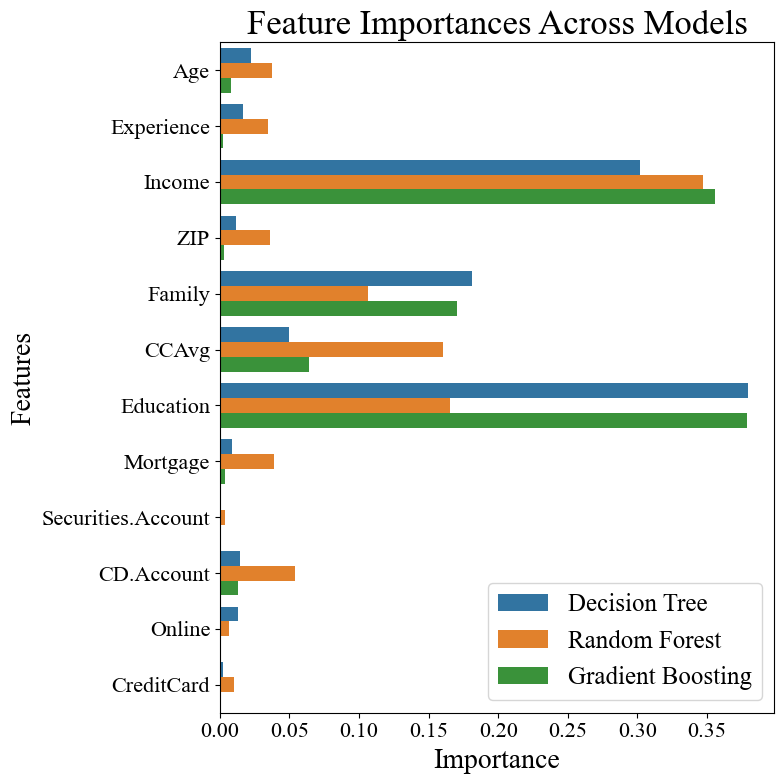

In [49]:
import seaborn as sns
# Decision Tree
dt_feature_importances = dt_clf.feature_importances_

# Random Forest
rf_feature_importances = rf_clf.feature_importances_

# Gradient Boosting
gb_feature_importances = gb_clf.feature_importances_

# Creating a DataFrame for feature importances
features = X.columns
importances_df = pd.DataFrame({
    'Features': features,
    'Decision Tree': dt_feature_importances,
    'Random Forest': rf_feature_importances,
    'Gradient Boosting': gb_feature_importances
})

# Melting DataFrame for easier plotting
importances_melted = importances_df.melt(id_vars='Features', var_name='Model', value_name='Importance')

# Plotting
plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Features', hue='Model', data=importances_melted)
plt.title('Feature Importances Across Models', fontsize=25, fontname="Times New Roman")
plt.xlabel('Importance', fontsize=20, fontname="Times New Roman")
plt.ylabel('Features', fontsize=20, fontname="Times New Roman")
plt.xticks(fontsize=16, fontname="Times New Roman")
plt.yticks(fontsize=16, fontname="Times New Roman")
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()


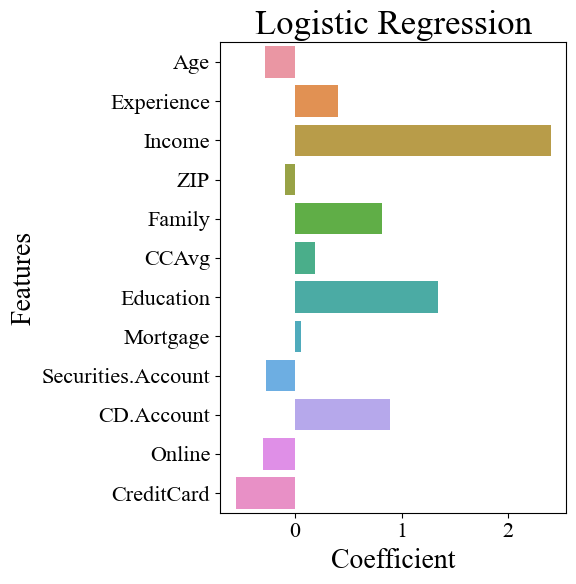

In [47]:
# Getting coefficients from Logistic Regression
feature_importances = gb_clf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)
lr_coefficients = log_reg.coef_.flatten()

# Creating a DataFrame for Logistic Regression coefficients
lr_importances_df = pd.DataFrame({
    'Features': features,
    'Coefficient': lr_coefficients
})

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x='Coefficient', y='Features', data=lr_importances_df)
plt.title('Logistic Regression', fontsize=25, fontname="Times New Roman")
plt.xlabel('Coefficient', fontsize=20, fontname="Times New Roman")
plt.ylabel('Features', fontsize=20, fontname="Times New Roman")
plt.xticks(fontsize=16, fontname="Times New Roman")
plt.yticks(fontsize=16, fontname="Times New Roman")
plt.tight_layout()
plt.show()


Feature Importance Plot: Shows the relative importance of each feature in the  model. Helps in understanding which features have the most influence on the model's predictions.

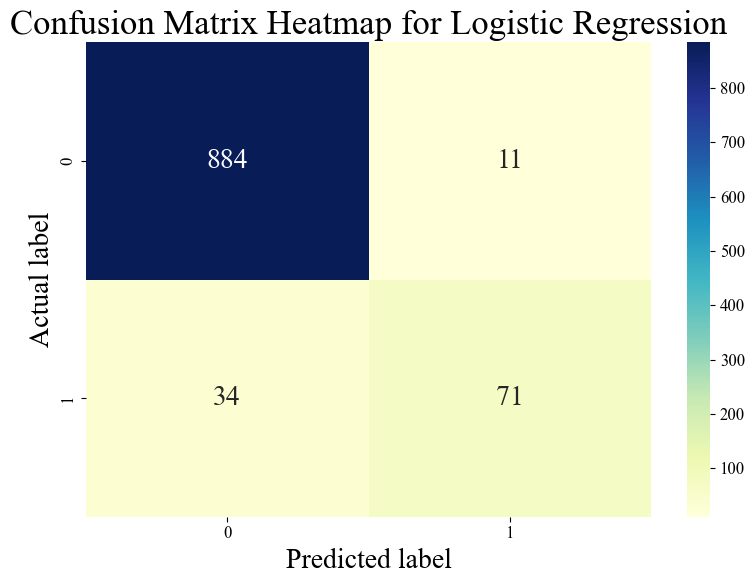

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"size": 20})
plt.title('Confusion Matrix Heatmap for Logistic Regression', fontsize=25)
plt.ylabel('Actual label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.tight_layout()
plt.show()


Confusion Matrix Heatmap: Visualizes the true positives, false positives, true negatives, and false negatives for the Logistic Regression model. It's crucial for understanding the model's performance in classifying each class.

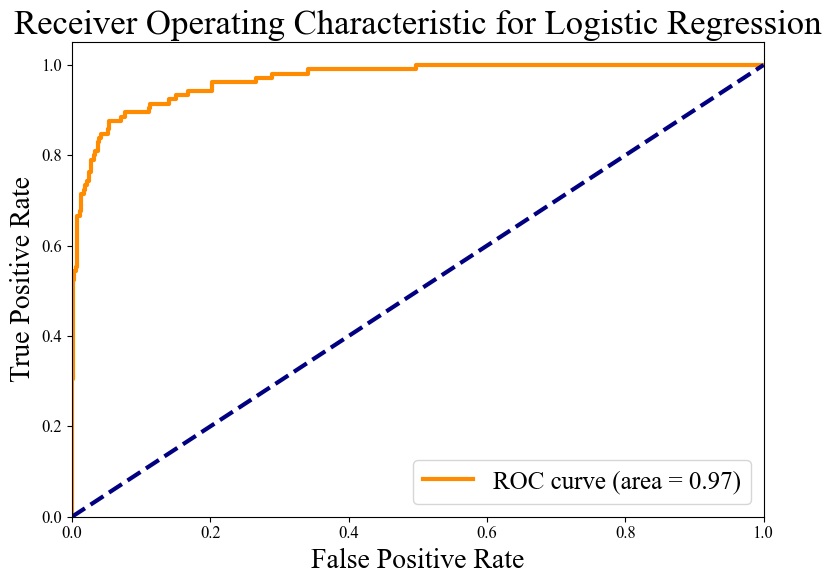

In [42]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('Receiver Operating Characteristic for Logistic Regression', fontsize=25)
plt.legend(loc="lower right", fontsize=18)
plt.tight_layout()
plt.show()


ROC Curve: Displays the trade-off between the true positive rate and false positive rate for the Logistic Regression model at various threshold settings. The area under the curve (AUC) provides a single metric to evaluate the model's overall performance.

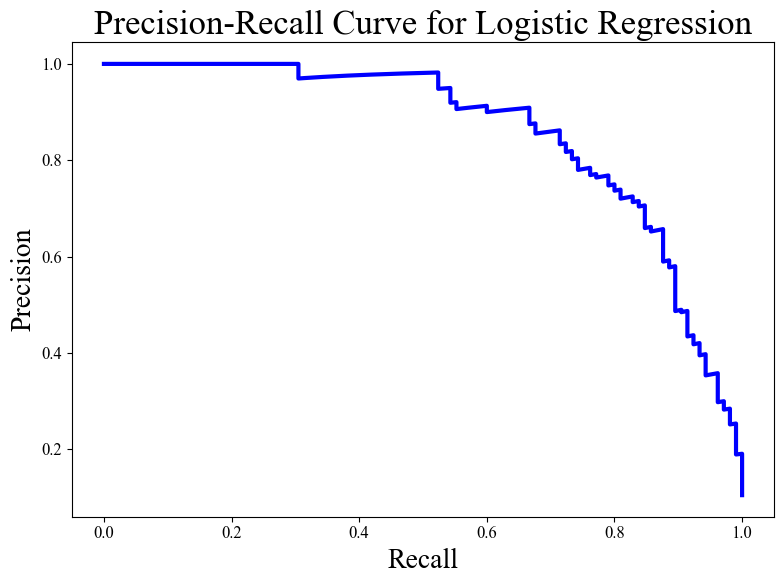

In [35]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=3)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.title('Precision-Recall Curve for Logistic Regression', fontsize=25)
plt.tight_layout()
plt.show()


Precision-Recall Curve: Shows the trade-off between precision and recall for different threshold values for the Logistic Regression model. Useful when the classes are imbalanced.

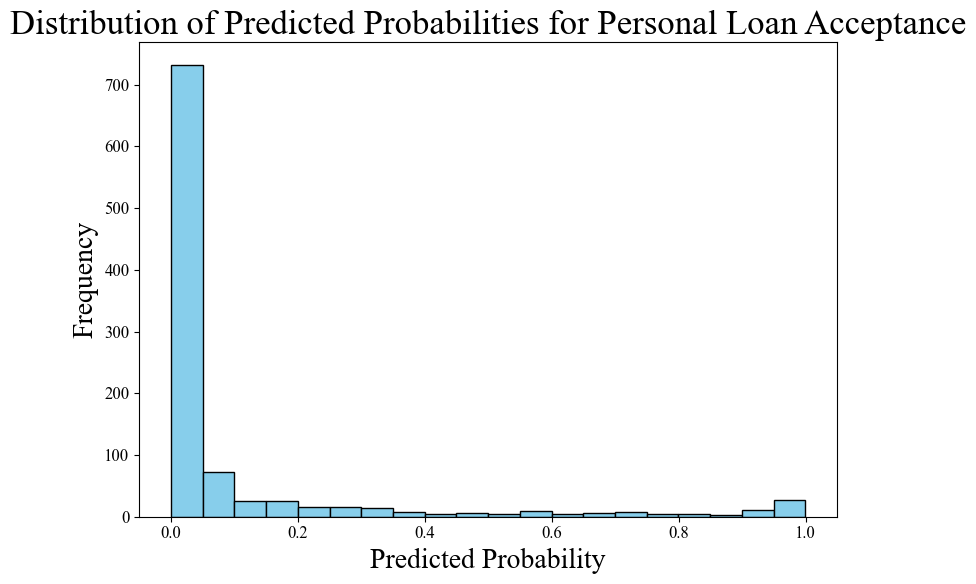

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities for Personal Loan Acceptance', fontsize=25)
plt.xlabel('Predicted Probability', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.tight_layout()
plt.show()


Distribution of Predicted Probabilities: Illustrates the frequency of the predicted probabilities for personal loan acceptance. Helps in understanding the model's confidence in its predictions.

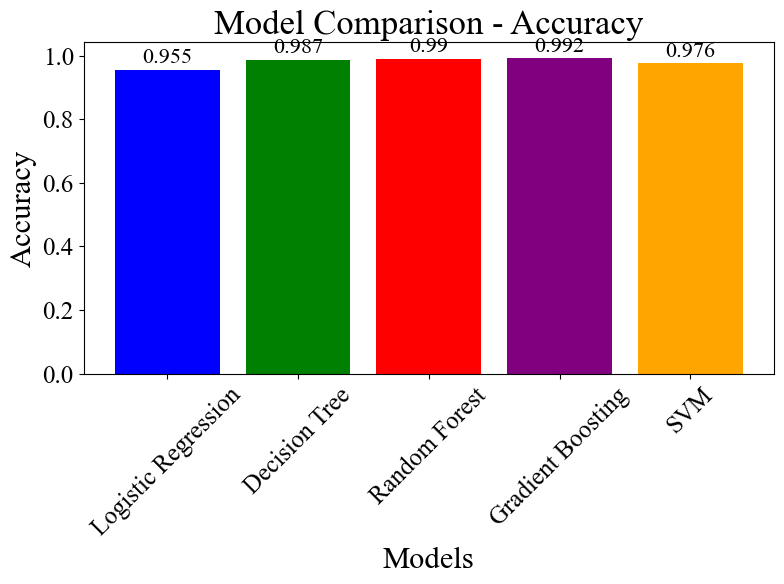

In [37]:
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in [log_reg, dt_clf, rf_clf, gb_clf, svm_clf]]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']


plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models', fontsize=22)
plt.ylabel('Accuracy', fontsize=22)
plt.title('Model Comparison - Accuracy', fontsize=25)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=16)

plt.show()


Model Comparison Bar Chart: Compares the accuracy of different models side by side. Helps in identifying the best-performing model.

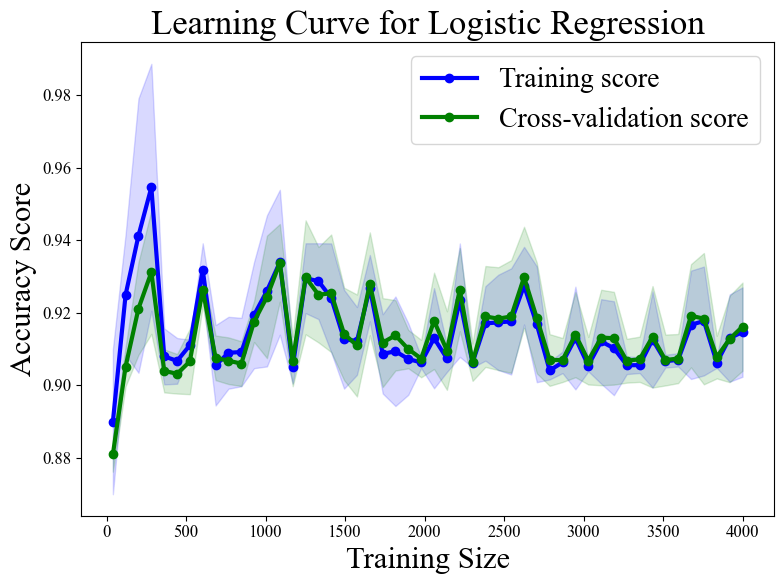

In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(log_reg, X, y, cv=5, scoring='accuracy', n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and standard deviation for train set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o', lw=3)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)

plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green', marker='o', lw=3)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.15)

plt.title('Learning Curve for Logistic Regression', fontsize=25)
plt.xlabel('Training Size', fontsize=22)
plt.ylabel('Accuracy Score', fontsize=22)
plt.legend(loc='best', fontsize=20)
plt.tight_layout()
plt.show()


Learning Curve: Shows the model's performance improvement as the size of the training data increases. Useful for understanding if more data would be beneficial.

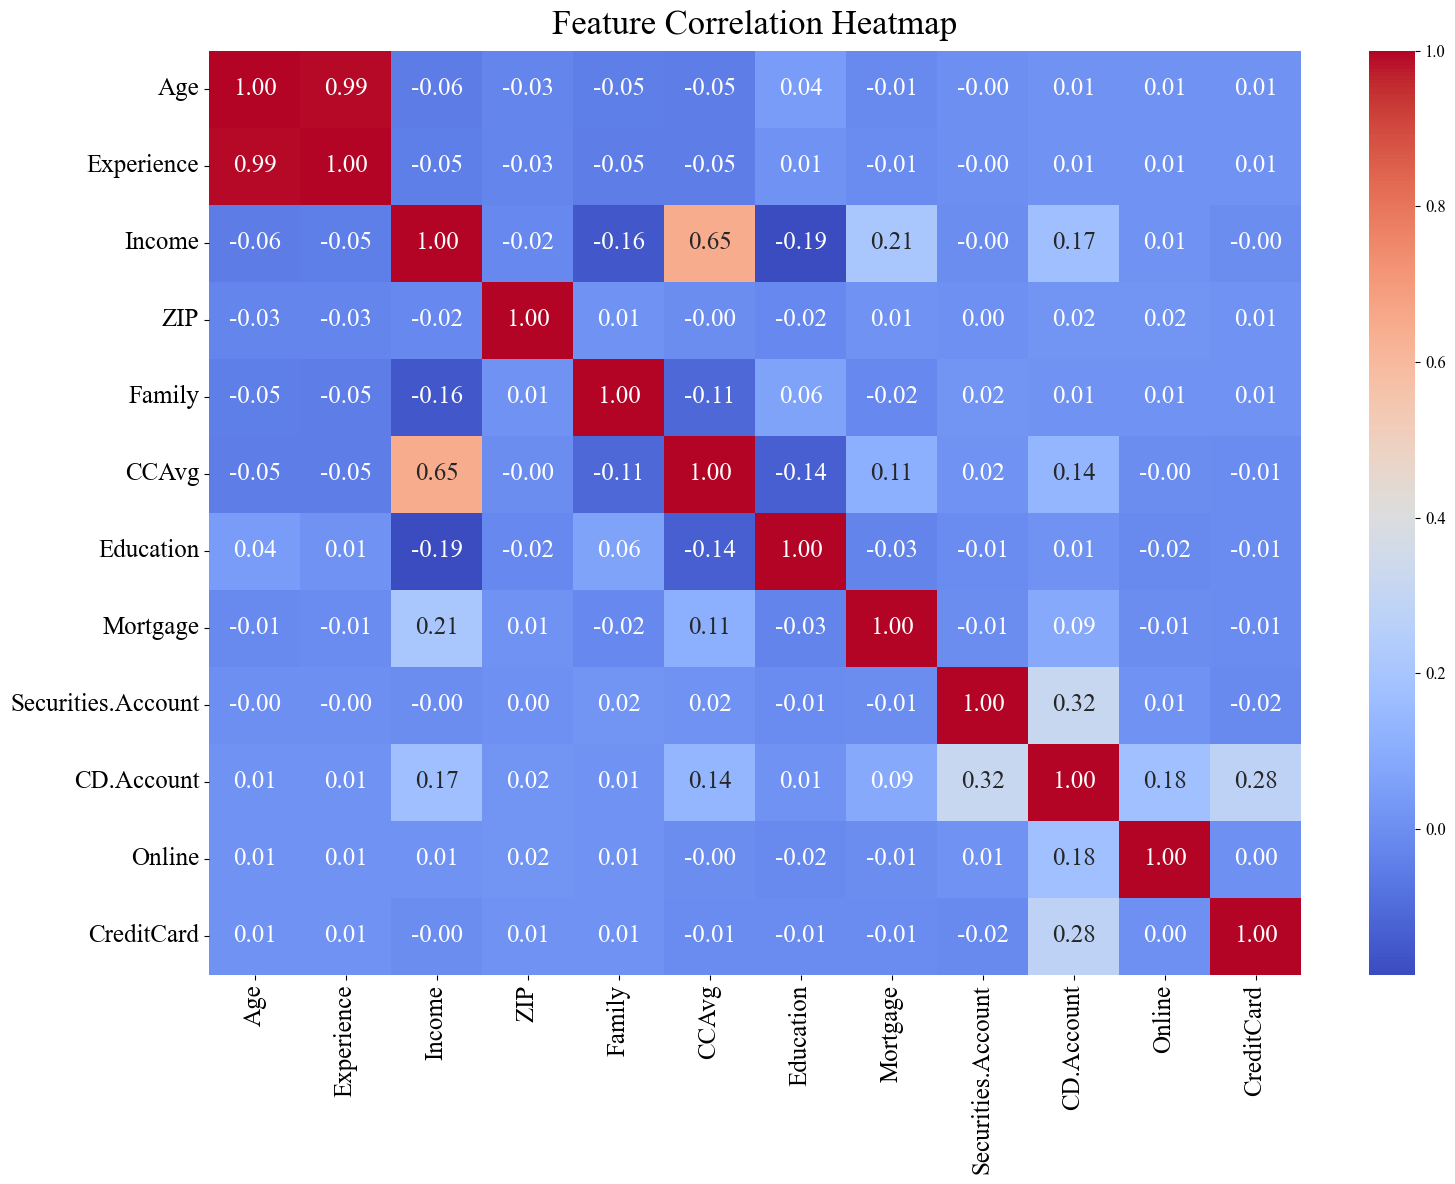

In [40]:
corr_matrix = data.drop(['ID', 'Personal.Loan'], axis=1).corr()

plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 18})
heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':25}, pad=12)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()


Feature Correlation Heatmap: Displays the correlation coefficients between features. Helps in identifying multicollinearity, which can affect some models.

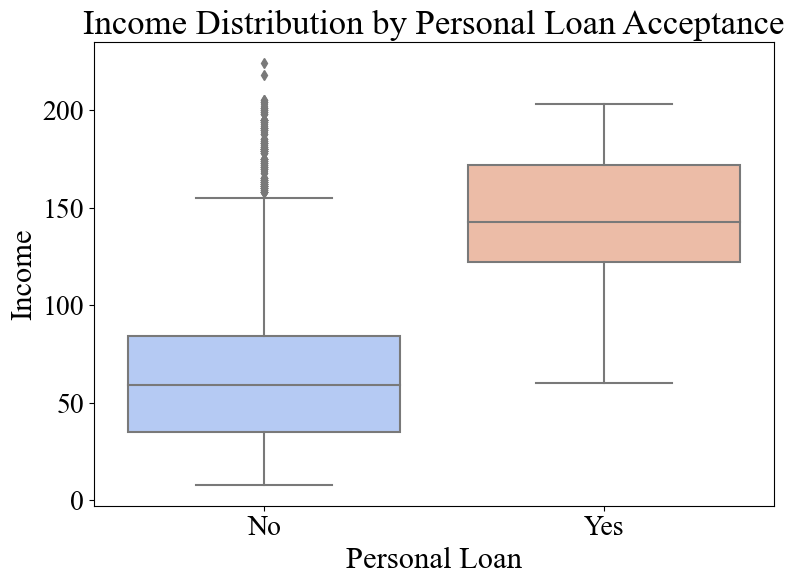

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal.Loan', y='Income', data=data, palette="coolwarm")
plt.title('Income Distribution by Personal Loan Acceptance', fontsize=25)
plt.xlabel('Personal Loan', fontsize=22)
plt.ylabel('Income', fontsize=22)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


Box Plot for Key Features by Loan Acceptance: Shows the distribution of a key feature (e.g., Income) for different classes of the target variable. Useful for understanding how the feature values differ between the classes.